# CTC Prediction Regression Task

## Importing libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
#Load the dataset
emp_data=pd.read_csv('Downloads/ML case Study.csv')

In [8]:
#display first 5 rows
emp_data.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879,4,74,32,73878.10


In [10]:
#Load colleges dataset
colleges=pd.read_csv('Downloads/Colleges.csv')

In [12]:
#Display first 5 rows of colleges dataset
colleges.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [14]:
#Load cities data
cities=pd.read_csv('Downloads/cities.csv')

In [16]:
#Display first 5 rows of cities dataset
cities.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [18]:
emp_data.shape

(1589, 8)

In [20]:
colleges.shape

(28, 3)

In [22]:
cities.shape

(9, 2)

In [24]:
#Displays the count of null values
emp_data.isnull().sum()

College                0
City                   0
Role                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
dtype: int64

In [26]:
colleges.isnull().sum()

Tier 1    6
Tier 2    0
Tier 3    9
dtype: int64

In [28]:
cities.isnull().sum()

Metrio City         0
non-metro cities    1
dtype: int64

In [30]:
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   int64  
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 99.4+ KB


In [32]:
colleges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tier 1  22 non-null     object
 1   Tier 2  28 non-null     object
 2   Tier 3  19 non-null     object
dtypes: object(3)
memory usage: 804.0+ bytes


In [34]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Metrio City       9 non-null      object
 1   non-metro cities  8 non-null      object
dtypes: object(2)
memory usage: 276.0+ bytes


In [36]:
colleges.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [38]:
# Creating Dictionaries for college tiers

college_tier_map={}
for i, tier in enumerate(['Tier 3','Tier 2','Tier 1'], start=1):
    for college in colleges[tier].dropna().values:
        college_tier_map[college.strip()]=i

In [40]:
# Creating dictionary for city types

metro_cities=cities['Metrio City'].dropna().values
non_metro_cities=cities['non-metro cities'].dropna().values

In [42]:
#Converting categorical data to numerical

city_map={city:1 for city in metro_cities}
city_map.update({city:0 for city in non_metro_cities})

In [44]:
# mapping the colleges in emp_data to thier respective tiers

emp_data['College_tier']=emp_data['College'].map(college_tier_map)

In [46]:
# Removing college from emp_data

emp_data.drop(('College'),axis=1,inplace=True)

In [48]:
#Mapping the cities in emp_data to respective cities

emp_data['City_type']=emp_data['City'].map(city_map)

In [50]:
# Removing city column from emp_data

emp_data.drop(('City'),axis=1,inplace=True)

# One hot encoding

In [53]:
#Creating dummy variables for the column "Role"
#Manager : 1, Executive : 0

emp_data['Role']=pd.get_dummies(emp_data['Role'],drop_first=True).astype(int)

In [55]:
emp_data

,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College_tier,City_type
0,1,55523,3,66,19,71406.58,2,0
1,0,57081,1,84,18,68005.87,2,0
2,0,60347,2,52,28,76764.02,1,0
3,0,49010,2,81,33,82092.39,1,0
4,0,57879,4,74,32,73878.10,3,0
...,...,...,...,...,...,...,...,...
1584,0,61285,3,44,60,77283.59,3,1
1585,0,63140,1,44,24,68416.86,3,0
1586,0,44907,1,60,19,70186.19,3,1
1587,0,52054,2,67,29,73394.09,3,0


# Correlation heatmap

<Axes: >

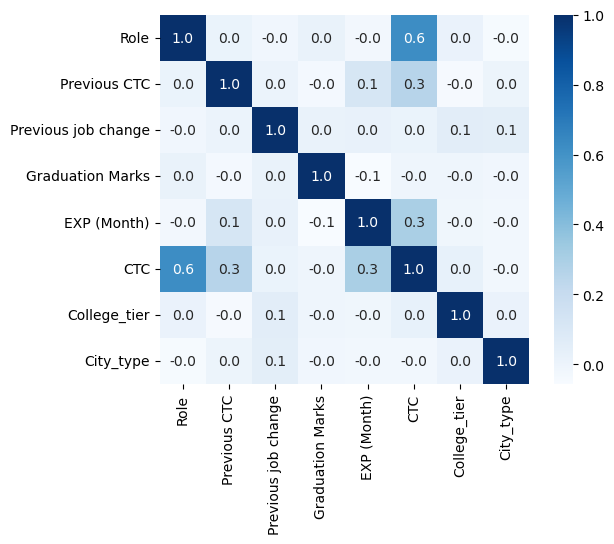

In [58]:
sns.heatmap(emp_data.corr(),square=True,fmt='.1f',annot=True,cmap='Blues')

CTC is most correlated with Role, EXP(Month), Previous CTC

## Descriptive Analysis

In [62]:
emp_data.describe()

,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College_tier,City_type
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,0.206419,55518.453744,2.528634,59.855255,39.044682,75353.278798,2.024544,0.514160
std,0.404862,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.838330,0.499957
min,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000,1.000000,0.000000
25%,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000,1.000000,0.000000
50%,0.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000,2.000000,1.000000
75%,0.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000,3.000000,1.000000
max,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000,3.000000,1.000000


## Data Visualization

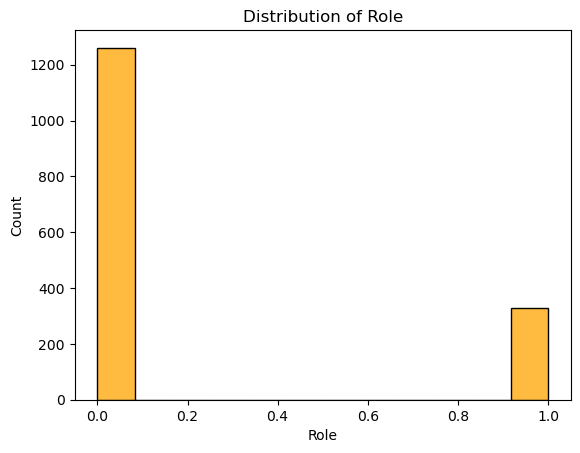

In [65]:
sns.histplot(emp_data['Role'],color='orange')
plt.xlabel('Role')
plt.ylabel('Count')
plt.title('Distribution of Role')
plt.show()

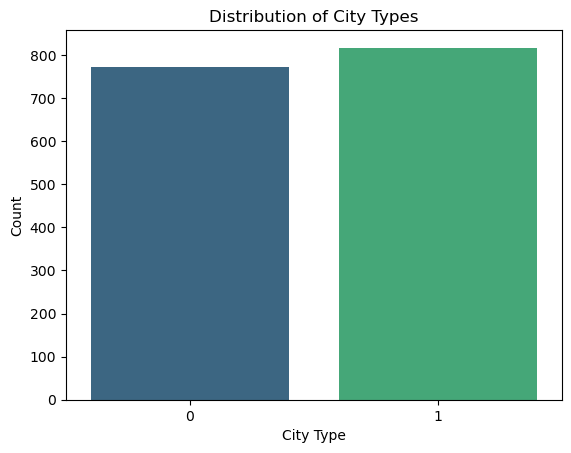

In [71]:
sns.countplot(data=emp_data, x='City_type', palette='viridis')
plt.xlabel('City Type')
plt.ylabel('Count')
plt.title('Distribution of City Types')
plt.show()

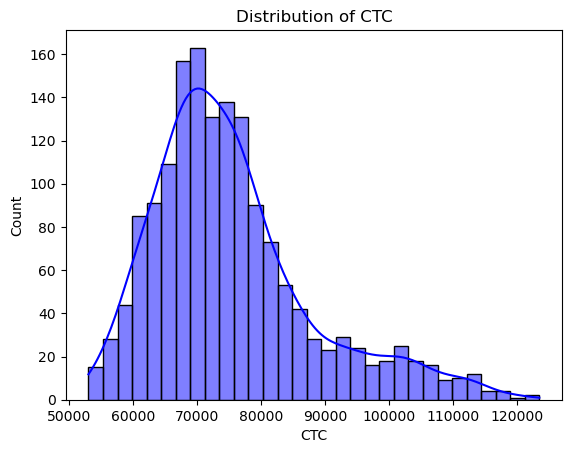

In [184]:
sns.histplot(data=emp_data, x='CTC', kde=True, color='blue')
plt.xlabel('CTC')
plt.title('Distribution of CTC')
plt.show()

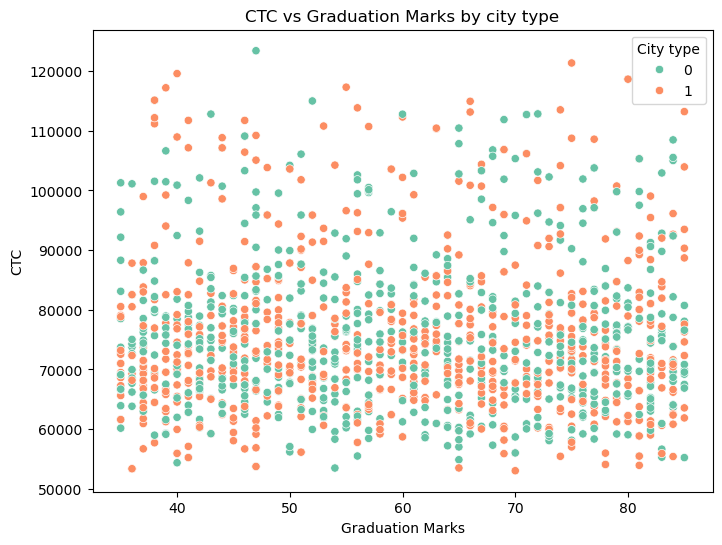

In [186]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=emp_data,x='Graduation Marks',y='CTC',hue='City_type',palette='Set2')
plt.xlabel('Graduation Marks')
plt.ylabel('CTC')
plt.title('CTC vs Graduation Marks by city type')
plt.legend(title='City type',loc='upper right')
plt.show()

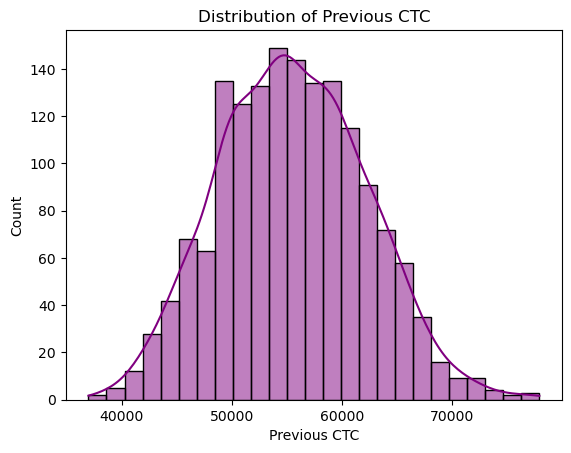

In [188]:
sns.histplot(emp_data['Previous CTC'],kde=True,color='purple')
plt.xlabel('Previous CTC')
plt.ylabel('Count')
plt.title('Distribution of Previous CTC')
plt.show()

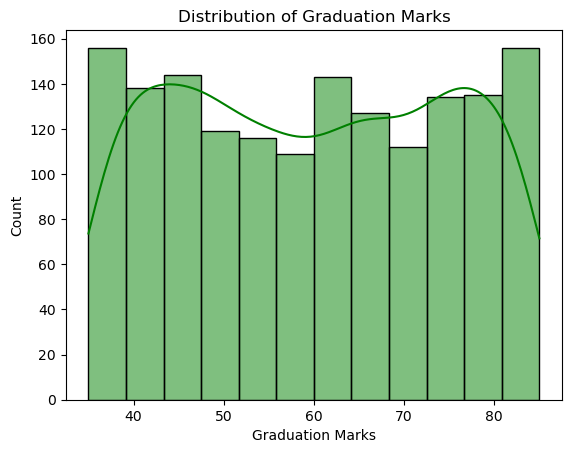

In [192]:
sns.histplot(emp_data['Graduation Marks'],kde=True,color='green')
plt.xlabel('Graduation Marks')
plt.ylabel('Count')
plt.title('Distribution of Graduation Marks')
plt.show()

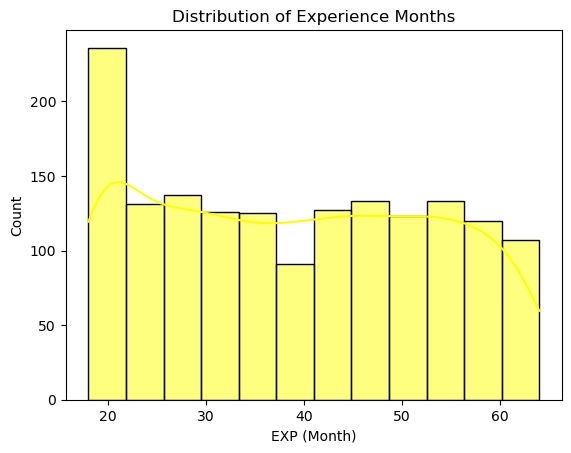

In [194]:
sns.histplot(emp_data['EXP (Month)'],kde=True,color='yellow')
plt.xlabel('EXP (Month)')
plt.ylabel('Count')
plt.title('Distribution of Experience Months')
plt.show()

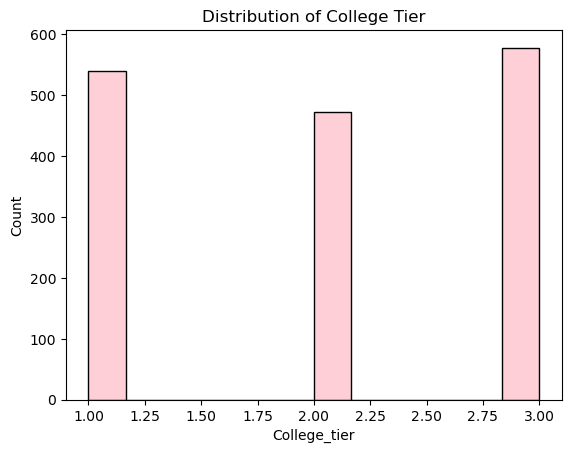

In [196]:
sns.histplot(emp_data['College_tier'],color='pink')
plt.xlabel('College_tier')
plt.ylabel('Count')
plt.title('Distribution of College Tier')
plt.show()

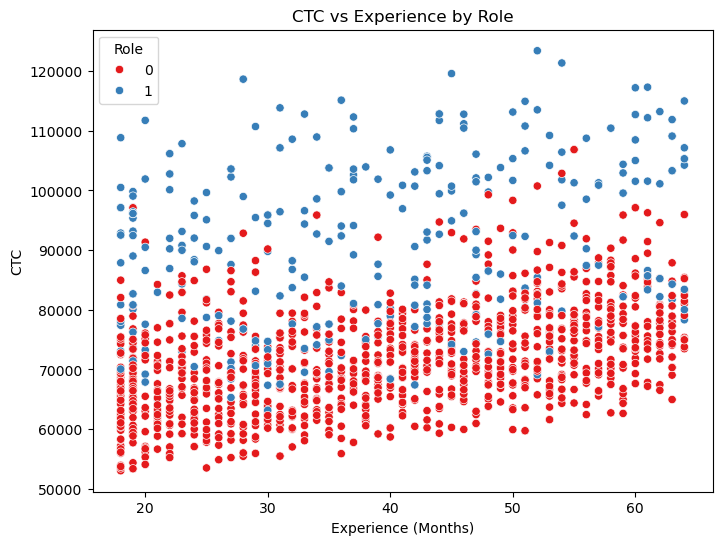

In [200]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=emp_data,x='EXP (Month)',y='CTC',hue='Role',palette='Set1')
plt.xlabel('Experience (Months)')
plt.ylabel('CTC')
plt.title('CTC vs Experience by Role')
plt.show()

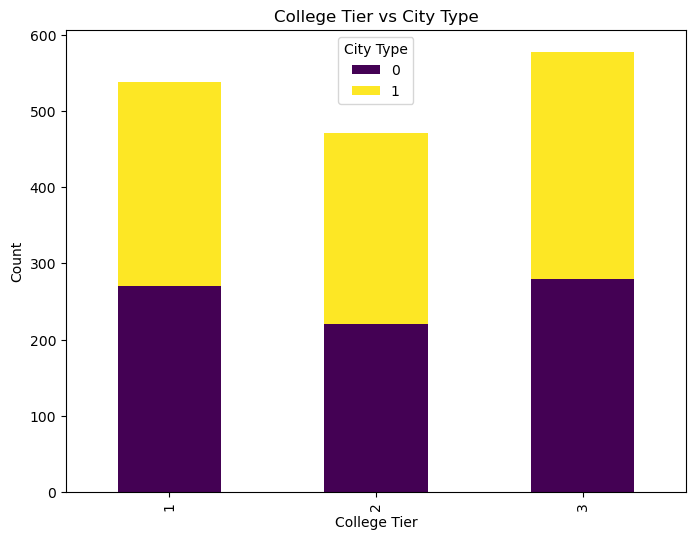

In [201]:
college_city = emp_data.groupby(['College_tier', 'City_type']).size().unstack()
college_city.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')
plt.xlabel('College Tier')
plt.ylabel('Count')
plt.title('College Tier vs City Type')
plt.legend(title='City Type')
plt.show()

## Independent Variable

In [205]:
X=emp_data.drop(('CTC'),axis=1)

## Dependent Variable

In [208]:
y=emp_data['CTC']

## Train test and split the data

In [211]:
from sklearn.model_selection import train_test_split

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Feature scaling

In [216]:
from sklearn.preprocessing import StandardScaler

In [218]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [220]:
X_scaled=scaler.fit_transform(X)

## Model training

In [223]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(alpha=0.1),  
    'Ridge': Ridge(alpha=0.1),  
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(learning_rate=0.1, n_estimators=100),
    'Bagging': BaggingRegressor(n_estimators=50, random_state=42),
    'XGBoost': XGBRegressor(learning_rate=0.1, n_estimators=100, random_state=42)
}

results = []

for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
     # Convert R2 Score to percentage for accuracy
    r2 = r2_score(y_test, y_pred) * 100 

    
    # Append results
    results.append({
        'Model': name,
        'MSE': mse,
        'R2 Score (%)': r2
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by='R2 Score (%)', ascending=False)

# Display results
print(results_df)


               Model           MSE  R2 Score (%)
4      Random Forest  7.328120e+07     60.141225
6            Bagging  7.334419e+07     60.106961
5  Gradient Boosting  7.446485e+07     59.497419
0  Linear Regression  7.777854e+07     57.695049
1              Lasso  7.777888e+07     57.694866
2              Ridge  7.778148e+07     57.693453
3      Decision Tree  1.144862e+08     37.729214
7            XGBoost  1.856994e+08     -1.004755


In [225]:
# Find the best model based on R2 Score
best_r2_row = results_df.loc[results_df['R2 Score (%)'].idxmax()]
best_r2_model_name = best_r2_row['Model']
best_r2_model_mse = best_r2_row['MSE']
best_r2_model_r2 = best_r2_row['R2 Score (%)']

print("\nBest Model Based on R2 Score:")
print(f"Model: {best_r2_model_name}")
print(f"MSE: {best_r2_model_mse}")
print(f"R2 Score (%): {best_r2_model_r2}")



Best Model Based on R2 Score:
Model: Random Forest
MSE: 73281196.9114763
R2 Score (%): 60.14122481280035


# 1. Your views about the problem statement?

- The problem statement is about predicting the Cost to Company (CTC) for employees based on various features such as their college tier, city type, role, years of experience, previous CTC, and other related attributes. This is a classic regression problem, where the objective is to predict a continuous value (CTC) based on input features.
- Data preparation : The data must be cleaned, preprocessed and categorical variables must be converted into numerical.
- Model Selection : Different regression models will be tested to find the best one for salary prediction.

# 2.What will be your approach to solving this task?

1. Data Preprocessing:
- Convert categorical data into numerical data.
- Handle missing values and outliers
- Feature scaling to ensure that features contribute equally to the model.
2. Exploratory Data Analysis (EDA):
- Identify correlations between features and the target variable (CTC).
- Analyze the distribution of features.
3. Model Selection:
- Test various regression models such as Linear Regression, Decision Tree, Random Forest, and Gradient Boosting.
- Evaluate models using performance metrics like Mean Squared Error (MSE), R-squared, etc.
4. Final Model Evaluation:
- Assess the final model on a test dataset.

# 3. What ML model options did you have available to perform this task?

For this regression problem: 

- Random Forest  
- Bagging  
- Gradient Boosting 
- Linear Regression 
- Ridge  
- Lasso
- Decision Tree  
- XGBoost

Evaluation Metrics:
- Mean Squared Error (MSE)
- R² Score
- Mean Absolute Percentage Error (MAPE)

# 4. Which model’s performance is best and what could be the possible reason for that?

Best Performing Model: Random Forest
- Captures non-linear relationships.
- Reduces overfitting.
- Effectively manage interactions between features.

# 5. What steps can you take to improve this selected model’s performance even further?

- Increase the number of trees (n_estimators). More trees can improve performance
 - Create new features by combining existing features to provide the model with additional useful information.
 - Adjust the max_depth of the trees. Limiting the depth of trees can prevent overfitting